<a href="https://colab.research.google.com/github/mosesimbahale/machineLearning/blob/main/Wine_quality_predictor0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Look @ the big picture

**problem statement**

predict the quality of wine on the basis of giving features

By the use of several Machine learning models, predict the quality of wine

**Dataset description:**

In this dataset, classes are ordered, but it was not balanced. Here, red wine instances are present at a high rate and white wine instances are less than red.

These are the name of Features from the dataset -:


* type
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality


**Different classifier models to predict the quality of the wine.**



> Random Forest Classifier(Regressor) - 


> Stochastic Gradient Descent Classifier -


> Support Vector Classifier(SVC) - 



**use cross validation evaluation technique to optimize the model performance.**


1. Grid Search CV
2. Cross Validation Score 


# Get the data

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd

#data visualization
import seaborn as sns


#Model
from sklearn.ensemble import RandomForestClassifier

#Accuracy
from sklearn.metrics import accuracy_score

#
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
#split data to train& test
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

**loading the dataset**

In [3]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
#store dataset in a Pandas Dataframe
path ="/content/drive/MyDrive/ML/datasets/winequality-red.csv"
data = pd.read_csv(path) 

# Discover and visualize the data to gain the insights (EDA)

**Understanding the variables**

In [ ]:
#first five rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Clean the data**

In [ ]:
#Checking for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Analyzing relationship between variables in the dataset**

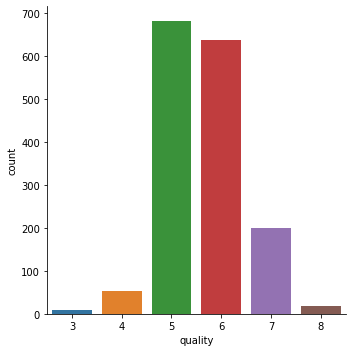

In [ ]:
#Number of values for each quality
sns.catplot(x='quality', data = data, kind = 'count')

#We have 6 quality values

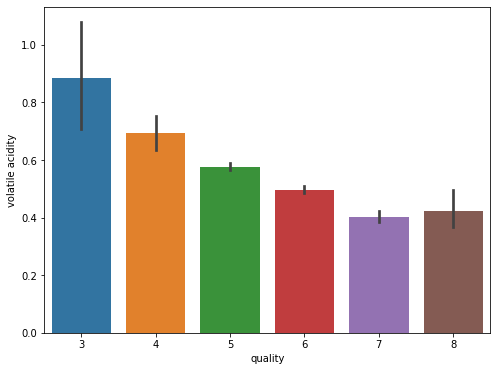

In [ ]:
#Volatile acidity vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x='quality', y = 'volatile acidity', data = data)

*volatile acidity is inversly propotianal to quality*

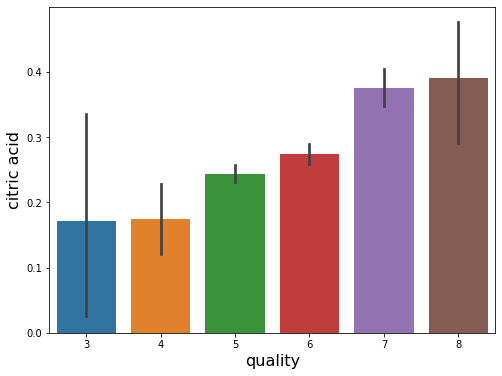

In [6]:
#Citric acid vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='citric acid', data=data)

Citric acid directly propotianal to quality

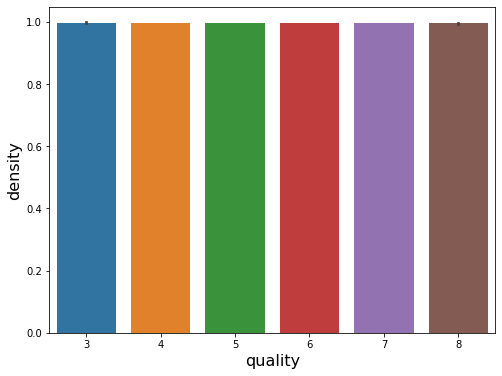

In [ ]:
#Density vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x='quality', y='density', data=data)

In [ ]:
#TO DO 
#Find relationship between all other variables 

*citric acid is directly propotional to quality*

**Correlation**

> positive correlation - Two values that are directly propotianal

> Negative correlation - Two values that are inversely propotianal


In [7]:
correlation = data.corr()

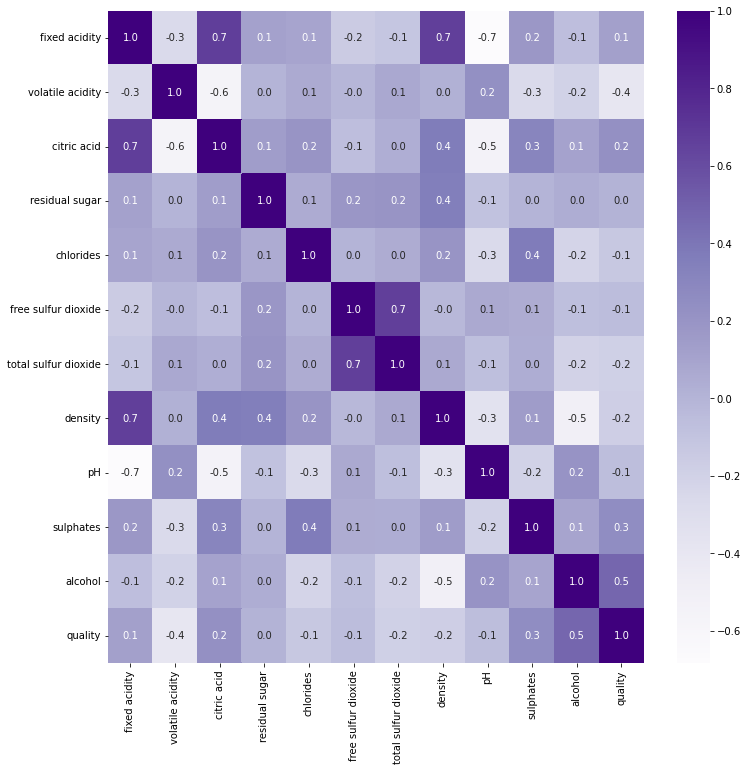

In [8]:
#Construct a heatmap to understand the correlation between columns

plt.figure(figsize=(12,12))

sns.heatmap(correlation, cbar=True, fmt = '.1f', annot=True, annot_kws={'size':10}, cmap = 'Purples')

TO DO 
list if findings on correlation


*   List item

*   List item
*   List item


*   List item




# Prerare the data for machine learning algorithm (data preprocessing)

In [ ]:
#Checking for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
#Separate the data and label
X = data.drop('quality', axis=1 )

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


**Label Binarization/ Label enoding**

In [13]:
#Labes GOOD (quality >= 7) and BAD (quality <= 6) 1 & 0  respectively

Y = data ['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


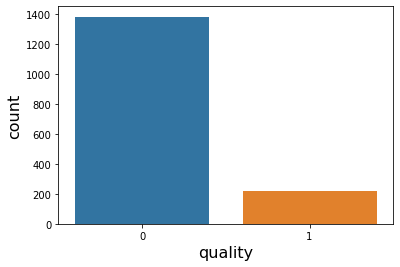

In [17]:
sns.countplot(Y)

In [26]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

**Train & Test spliting of the dataset**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [29]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


# Select the model & train it

**Random Forest classifier**

In [ ]:
#Model selection -> Random forest classifier
#Model Training

model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

**Model evaluation**

In [ ]:
#Accuracy on the test data

X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy: ', test_data_accuracy)

Accuracy:  0.934375


**Build a predictive system**

In [ ]:
'''

input_data = (7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8)

#Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print(prediction)



if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad quality wine')

'''

**Stochastic Gradient Descent Clasifier (SGD)**

In [32]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(X_test)

In [35]:
print(classification_report(Y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       283
           1       0.30      0.78      0.44        37

    accuracy                           0.77       320
   macro avg       0.63      0.77      0.64       320
weighted avg       0.89      0.77      0.80       320



**Support Vector classifier**

In [38]:
svc = SVC()
svc.fit(X_train, Y_train)
pred_svc = svc.predict(X_test)


In [40]:
print(classification_report(Y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       283
           1       0.00      0.00      0.00        37

    accuracy                           0.88       320
   macro avg       0.44      0.50      0.47       320
weighted avg       0.78      0.88      0.83       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Fine tune your model

**Let's try to increase our accuracy of models**

In [ ]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, Y_train)

In [ ]:
#Best parameters for the svc model
grid_svc.best_params_

In [ ]:
#Run the SVC again with the best parameters
svc2 = SVC(C = 1.2, gamma = 0.9, kernel = 'rbf')
svc2.fit(X_train, Y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

**Cross validation score for Random Forest and SGD**

In [ ]:
#Now let's try to do some evaluation for Random Forest Model using cross validation

rfc-eval = cross_val_score(estimator = rfc, X = X_train, Y=Y_train, cv=1 0)

rfc_eval.mean()

# Present the solution

# Launch monitor and maintain the system